<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/tf/fashion_mnist_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패션MNIST 분류 (Sequential Model)

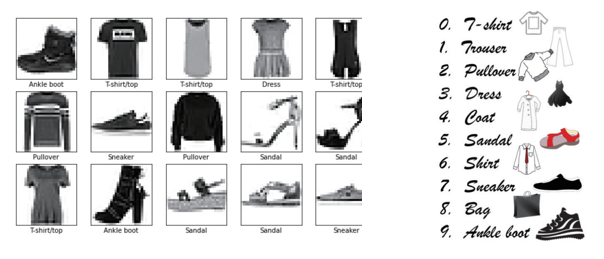

- 패션 MNIST는 제란도Zelando라는 연구자 웹사이트에서 개발하여 공개한 데이터 셋으로, 텐서플로의 케라스 모듈에서 제공, 운동화나 셔츠 같은 옷과 신발의 이미지와 이 이미지에 대한 레이블을 제공

- 학습을 위해 6만 장의 28×28 픽셀 크기의 회색조 이미지와 테스트를 위한 데이터로 1만 장의 이미지 제공 .

MNIST 데이터는 너무 단순해서 심층 신경망 모델의 성능을 제대로 평가하기에 부족, 좀 더 복잡한  fashion MNIST


## 1.데이터 가져오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# keras의 데이터셋의 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
# prompt: (train_images, train_labels), (test_images, test_labels)의 데이터 건수출력

print("훈련 세트의 이미지 수:", train_images.shape[0])
print("훈련 세트의 레이블 수:", train_labels.shape[0])
print("테스트 세트의 이미지 수:", test_images.shape[0])
print("테스트 세트의 레이블 수:", test_labels.shape[0])


훈련 세트의 이미지 수: 60000
훈련 세트의 레이블 수: 60000
테스트 세트의 이미지 수: 10000
테스트 세트의 레이블 수: 10000


## 2.데이터 살펴보기

In [3]:
print(train_images[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

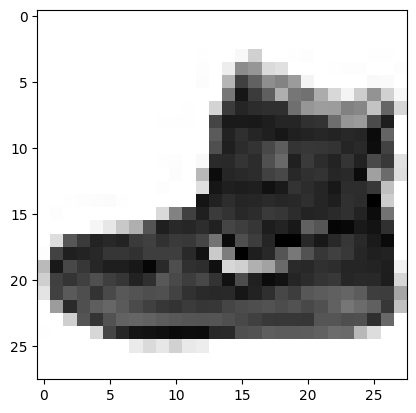

In [4]:
plt.imshow(train_images[0],cmap='Greys')

In [5]:
fashion_class = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']


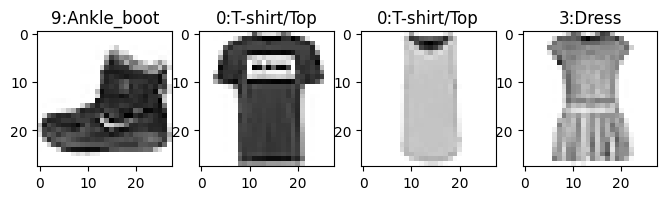

In [6]:
plt.figure(figsize=(8,3))

#타이틀로 이미지와 레이블 함께 보기
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(f"{train_labels[i]}:{fashion_class[train_labels[i]]}")

    #ax = plt.gca()
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)

    plt.imshow(train_images[i], cmap='Greys') # i번째 훈련용 데이터

* 생략 가능

bbox={'facecolor': 'white'}: 이 부분은 텍스트 상자의 스타일을 지정합니다.

bbox (bounding box)는 텍스트 주위에 상자를 그리는데, 여기서는 배경색(facecolor)을 흰색으로 설정하고 있습니다.



Text(0, 0, 'Dress')

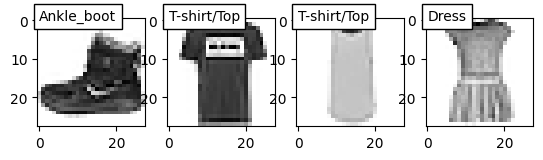

In [ ]:
fig=plt.figure()

ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)

ax1.imshow(train_images[0],cmap='Greys')    # 첫 번째 데이터
ax2.imshow(train_images[1],cmap='Greys')    # 두 번째 데이터
ax3.imshow(train_images[2],cmap='Greys')    # 세 번째 데이터
ax4.imshow(train_images[3],cmap='Greys')    # 네 번째 데이터

#그래프에 제목을 텍스트로 추가하기

ax1.text(0,0,fashion_class[train_labels[0]],bbox={'facecolor': 'white'})
ax2.text(0,0,fashion_class[train_labels[1]],bbox={'facecolor': 'white'})
ax3.text(0,0,fashion_class[train_labels[2]],bbox={'facecolor': 'white'})
ax4.text(0,0,fashion_class[train_labels[3]],bbox={'facecolor': 'white'})

## 3.데이터 전처리

In [7]:
train_images, test_images = train_images/ 255, test_images / 255

## 4.패션 MNIST 데이터 학습시키기 (모델생성)

#### (1) 모델 구성

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### (2) 학습 및 평가

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

In [12]:
#test_loss,test_acc=model.evaluate(test_images, train_labels,verbose=2)
test_loss,test_acc=model.evaluate(test_images, test_labels,verbose=2)

print('\n 테스트정확도 : ', test_acc )

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2273 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2134 - accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2071 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2020 - accuracy: 0.9228
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1949 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1906 - accuracy: 0.9263
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1829 - accuracy: 0.9296
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1773 - accuracy: 0.9317
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1732 - accuracy: 0.9330
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.167

위의 패션 MNIST 데이터를 인공신경망을 통해 예측하고 그것을 평가한 결과 약 88% 정도의 정확도가 나옴.

이전 손글씨 데이터에 비해 정확도가 떨어지는데 그 이유는 뭘까?

1. Fashion MNIST는 의류 아이템의 이미지를 포함하고 있으며, MNIST는 손으로 쓴 숫자의 이미지를 포함합니다. 이 두 데이터셋은 비주얼 패턴, 복잡성, 클래스 간의 변별력 등 여러 면에서 차이를 보입니다. Fashion MNIST의 정확도가 MNIST보다 낮게 나타나는 주요 이유는 다음과 같습니다:

2. 복잡성: Fashion MNIST의 이미지는 MNIST의 숫자 이미지에 비해 시각적으로 더 복잡합니다. 의류 아이템은 다양한 형태와 패턴을 가지고 있으며, 이는 모델이 학습해야 할 패턴의 복잡성을 증가시킵니다.

3. 클래스 간 변별력: Fashion MNIST의 클래스(예: 바지, 셔츠, 신발 등)는 서로 비슷한 형태를 가질 수 있어, 모델이 이들을 정확히 구분하는 것이 더 어려울 수 있습니다. 반면, MNIST의 숫자들은 상대적으로 서로 구별하기 쉽습니다.

4. 내재적 변동성: Fashion MNIST의 각 클래스 내에서의 변동성(예: 같은 카테고리 내 다양한 스타일과 디자인)이 MNIST의 숫자들보다 클 수 있습니다. 이는 모델이 클래스 내 패턴을 일반화하는 것을 더 어렵게 만듭니다.

5. 필요한 모델 복잡도: 위에서 언급한 요인들로 인해 Fashion MNIST를 잘 처리하기 위해서는 더 복잡한 모델 구조가 필요할 수 있습니다. 기존의 MNIST 데이터셋에 잘 작동하는 모델이 Fashion MNIST에는 충분하지 않을 수 있습니다.

6. 데이터 전처리 및 증강: Fashion MNIST 데이터에 적합한 전처리 및 데이터 증강 방법이 MNIST와 다를 수 있으며, 이러한 차이가 모델의 성능에 영향을 미칠 수 있습니다.

이러한 요인들로 인해 Fashion MNIST 데이터셋에서 모델을 훈련시킬 때는 더 세심한 주의와 튜닝이 필요하며, 때로는 더 고급 모델 구조를 사용해야 할 수도 있습니다.

## 5.새로운 이미지로 테스트

In [13]:
test_images.shape

(10000, 28, 28)

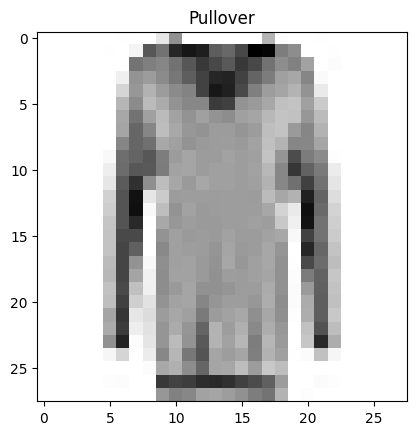

In [18]:
randIdx = np.random.randint(0, 9999)   # 10,000개의 테스트 이미지 중 하나를 선택

plt.title(f"{fashion_class[test_labels[randIdx]]}")
plt.imshow(test_images[randIdx], cmap='Greys')

In [19]:
# 2차원 데이터를 3차원으로 수정 필요
# 각각의 레이블과 일치하는 정도를 0에서 1 사이의 확률값으로 출력

y_hat = model.predict( test_images[randIdx][np.newaxis, :, :])
print(y_hat)
print("판정: ", y_hat.argmax())
print(f"판정 :{fashion_class[y_hat.argmax()]}")


1/1 [==============================] - 0s 21ms/step
[[2.5936381e-05 1.2110117e-07 8.7022150e-01 6.4972427e-04 1.2318617e-01
  2.4837141e-09 5.9153079e-03 7.7175855e-10 1.2342840e-06 4.4456236e-12]]
판정:  2
판정 :Pullover
